In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'retina'

In [2]:
# Cached EPICS pv data
#epics = epics_proxy('data/epics_snapshot_2018-03-06T11:22:45.000000-08:00.json', verbose=True)

# LCLS `cu_hxr` Model

In [3]:
from lcls_live.bmad import LCLSTaoModel
from lcls_live.epics import epics_proxy
import os

In [4]:
# Make sure this exists
assert 'LCLS_LATTICE' in os.environ

In [5]:
M = LCLSTaoModel('cu_hxr', epics = None, verbose=True, ploton=True)
print(M)

Initialized Tao with /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpnpe4_nbi/tao/tao.init
Configured.
TODO: epics hooks for cu_hxr


In [6]:
%%tao 
sho var linac_fudge

-------------------------
Tao> sho var linac_fudge
  Variable                   Slave Parameters           Meas         Model        Design  Useit_opt
  linac_fudge[1]             O_L1_FUDGE[F]          0.0000E+00    1.0000E+00    1.0000E+00       F
  linac_fudge[2]             O_L2_FUDGE[F]          0.0000E+00    1.0000E+00    1.0000E+00       F
  linac_fudge[3]             O_L3_FUDGE[F]          0.0000E+00    1.0000E+00    1.0000E+00       F
  Variable                   Slave Parameters           Meas         Model        Design  Useit_opt
-------------------------
Tao> 


## Track particles

In [7]:
%%tao
set beam_init beam_track_end = UEEND
set csr_param n_bin = 40
snparticle 10000
beamon
beamoff

-------------------------
Tao> set beam_init beam_track_end = UEEND
-------------------------
Tao> set csr_param n_bin = 40
-------------------------
Tao> snparticle 10000
-------------------------
Tao> beamon
-------------------------
Tao> beamoff
-------------------------
Tao> 


In [8]:
%%tao
place floor emittancexy
x-a all s
sc

-------------------------
Tao> place floor emittancexy
-------------------------
Tao> x-a all s
-------------------------
Tao> sc
-------------------------
Tao> 


# Plot

In [10]:
from pmd_beamphysics import ParticleGroup

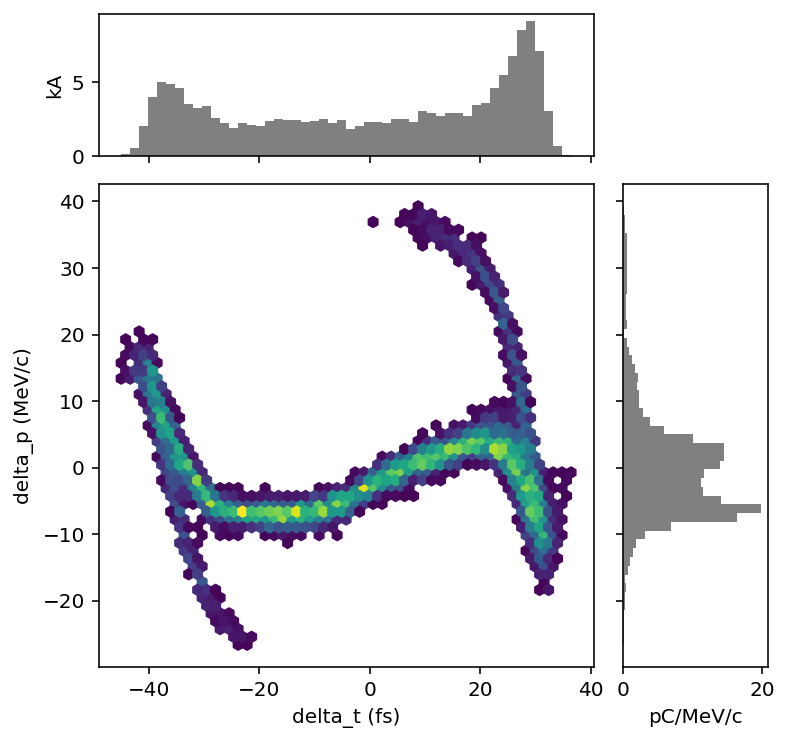

In [11]:
P1 = ParticleGroup(data=M.bunch_data('UEBEG'))
P1.plot('delta_t', 'delta_p', figsize=(6,6))

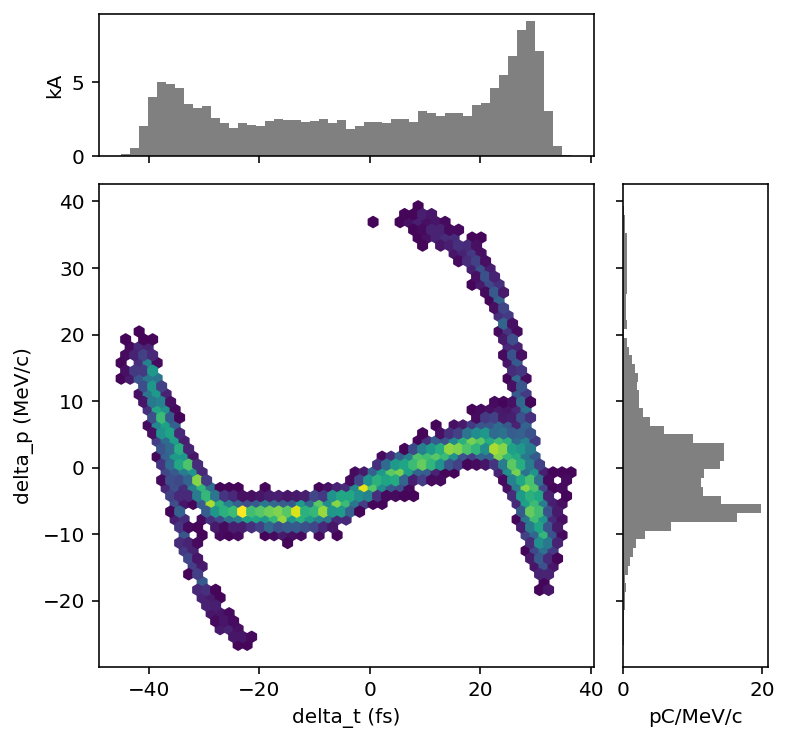

In [12]:
P1 = ParticleGroup(data=M.bunch_data('UEEND'))
P1.plot('delta_t', 'delta_p', figsize=(6,6))